# Data understanding and preparation

## 1.1 Data understanding

### 1.1.1 Pandas installation 
`pandas` is needed for the sake of Data understanding and preparation.
You can skip this step if you've already installed this library. 


In [1]:
%conda install pandas

2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/gabriele/miniconda3/envs/DADH

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.11.12         |  py313h06a4308_0         154 KB
    ------------------------------------------------------------
                                           Total:         154 KB

The following packages will be UPDATED:

  certifi                         2025.10.5-py313h06a4308_0 --> 2025.11.12-py313h06a4308_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


### 1.1.2 Load the dataset

read the `.csv` file we need for the **DU**. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

notebook_dir = Path().resolve()
LAB_CODES_PATH = notebook_dir.parents[1] / "Data" / "laboratory_events_codes_2.csv"
df = pd.read_csv(LAB_CODES_PATH)

### 1.1.3 Identifyng attributes's character
Printing general  about the dataFrame `df`

In [3]:
df.shape

(978503, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


## 1.2. Data Preparation

### 1.2.1 Removing duplicates

In [5]:
df.shape
df = df.drop_duplicates()
df.shape

(978501, 14)

### 1.2.2 Missing values
We estimate the percentage of *missing values* contained in each column. 

In [6]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Column '{col}': {missing_percentage:.2f}% missing values")

Column 'hadm_id': 0.00% missing values
Column 'charttime': 0.00% missing values
Column 'value': 4.55% missing values
Column 'valuenum': 7.27% missing values
Column 'valueuom': 9.60% missing values
Column 'ref_range_lower': 11.54% missing values
Column 'ref_range_upper': 11.54% missing values
Column 'flag': 64.88% missing values
Column 'label': 0.00% missing values
Column 'fluid': 0.00% missing values
Column 'examination_group': 0.00% missing values
Column 'analysis_batch_id': 0.00% missing values
Column 'qc_flag': 0.00% missing values
Column 'ref_range': 85.06% missing values


We can create a bar chart that reports the number of missing values in each variable 

/tmp/ipykernel_11721/4090193844.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')


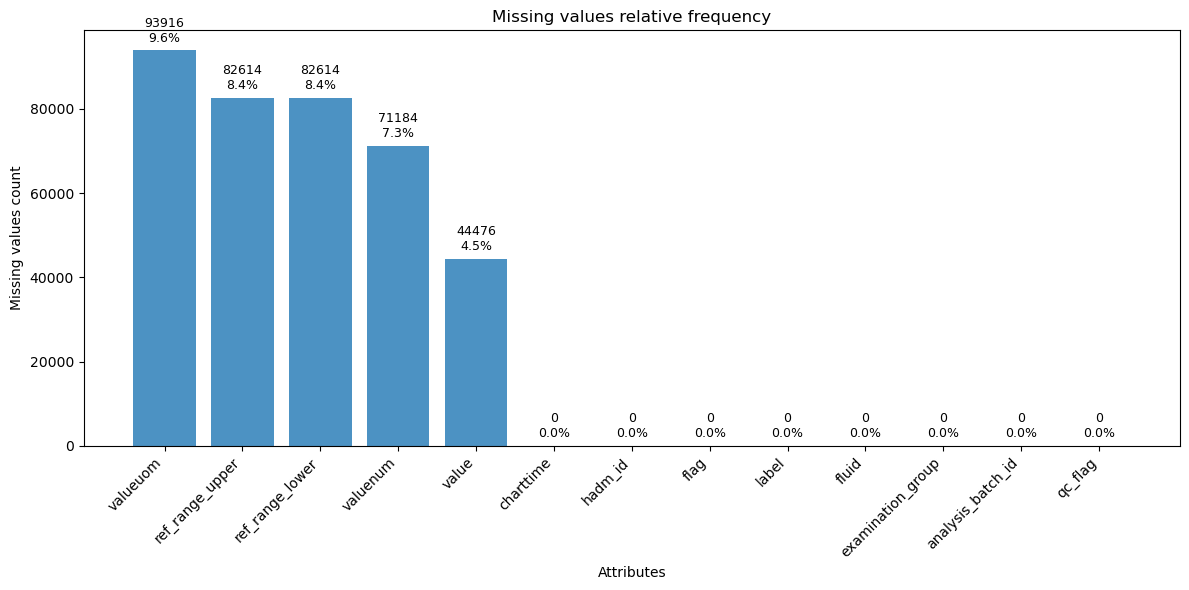

In [37]:
# Bar chart dei missing values per colonna (frequenza e percentuale)
missing_counts = df.isnull().sum()
total = len(df)
missing_counts = missing_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='tab:blue', alpha=0.8)
ax.set_title("Missing values relative frequency")
ax.set_xlabel("Attributes")
ax.set_ylabel("Missing values count")
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
for bar, count in zip(bars, missing_counts.values):
    pct = count / total * 100
    ax.annotate(f"{count}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

From this bar chart we can now see that the `flag` and `ref_range` attributes have a lot of missing values. 
Let's have a look at them.


#### 1.2.2.1 `flag` correction

In [8]:
df['flag'].value_counts()

flag
abnormal    343687
Name: count, dtype: int64

We can replace the `abnormal` with a 1, and the rest of the fields we put a 0 which indicates that the test is not abnormal.

In [9]:
df['flag'] = df['flag'].str.strip().str.lower()
df['flag'] = df['flag'].apply(lambda x: 1 if x == 'abnormal' else 0)
df['flag'].value_counts()

flag
0    634814
1    343687
Name: count, dtype: int64

#### 1.2.2.2 `ref_range` correction

We can observe that there isn't coerence between the values of `ref_range_lower`, `ref_range_upper` and `ref_range`. 
For this reason, we can drop the column `ref_range` because it has already a big percentage of missing values.

In [10]:
ref_range_not_null = df[df['ref_range'].notna()][['ref_range', 'ref_range_lower', 'ref_range_upper']]
print(ref_range_not_null.head(20))

                ref_range  ref_range_lower  ref_range_upper
6    Normal range: 70-110              4.8              5.9
10    Normal range: 10-20              8.4             10.3
21      Normal range: 3-5              2.7              4.5
29      Normal range: 3-5             27.0             32.0
32   Normal range: 70-110            150.0            440.0
37    Normal range: 10-20             12.0             16.0
40      Normal range: 3-5             82.0             98.0
42   Normal range: 70-110             10.5             15.5
56      Normal range: 3-5            133.0            145.0
58    Normal range: 10-20              6.0             20.0
66    Normal range: 10-20             25.0             36.5
68   Normal range: 70-110             12.0             16.0
72    Normal range: 10-20            150.0            440.0
77   Normal range: 70-110             22.0             32.0
79    Normal range: 10-20             96.0            108.0
83   Normal range: 70-110              1

In [11]:
df.drop(columns=['ref_range'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               978501 non-null  int64  
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.5+ MB


#### 1.2.2.3 `ref_range_upper` and `ref_range_lower` correction 

To start, we check the distribution of these variables in box plots

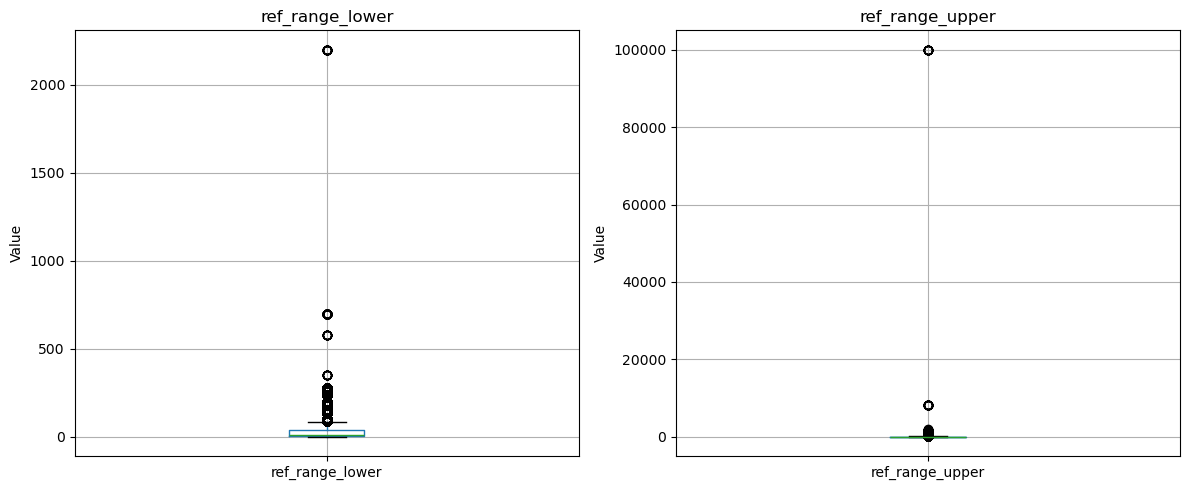

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='ref_range_lower', ax=axes[0])
axes[0].set_title('ref_range_lower')
axes[0].set_ylabel('Value')

df.boxplot(column='ref_range_upper', ax=axes[1])
axes[1].set_title('ref_range_upper')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

From this box plots, we can check the presence of extreme outliers. <br>
For handling there attributes we can check the correlation between the test and the ref ranges to see if there are some patterns

In [27]:
df[['ref_range_lower', 'ref_range_upper', 'label']].value_counts()

ref_range_lower  ref_range_upper  label                
96.0             108.0            Chloride                 36612
3.3              5.1              Potassium                35742
6.0              20.0             Urea Nitrogen            35651
22.0             32.0             Bicarbonate              34925
1.6              2.6              Magnesium                33791
                                                           ...  
85.0             145.0            Factor II                    1
70.0             140.0            Protein C, Antigen           1
80.0             160.0            Factor X                     1
70.0             140.0            Protein S, Antigen           1
                 170.0            Protein C, Functional        1
Name: count, Length: 314, dtype: int64

We discover that for some exams, detected by `label`, there are a great number of records that assumes particular `ref_range_lower` and `ref_range_upper`, identifying a mode. <br>
What we can do is to substitute the outliers, reffering to these labels, with their mode. 

In [ ]:
print(df[df['ref_range_lower'].isnull() & df['ref_range_upper'].isnull()].value_counts())
print(df[df['ref_range_lower'].isnull() & df['ref_range_upper'].isnull()].head())

label
Specimen Type                    10218
Base Excess                       7325
Oxygen Saturation                 5068
Estimated GFR (MDRD equation)     3008
Bilirubin                         2863
                                 ...  
Triple Phosphate Crystals            1
Calcium, Body Fluid                  1
Chloride, Body Fluid                 1
Creatinine, Body Fluid               1
Miscellaneous, Ascites               1
Name: count, Length: 274, dtype: int64
        hadm_id            charttime value  valuenum valueuom  \
12   29654838.0  2188-01-05 06:56:00   3.5       3.5    Ratio   
102  26913865.0  2189-06-29 14:00:00   0.2       0.2    mg/dL   
171  26913865.0  2189-07-02 10:20:00   NaN       NaN      NaN   
193  26913865.0  2189-07-02 10:20:00   NaN       NaN      NaN   
328  23822395.0  2129-08-06 10:48:00     0       0.0    mEq/L   

     ref_range_lower  ref_range_upper  flag                          label  \
12               NaN              NaN     0  Cholesterol 

In [51]:
# print(df[df['ref_range_lower'].isnull() & df['ref_range_upper'].isnull() & df['flag'] == 0]['label'].value_counts())
print(df[df['ref_range_lower'].isnull() & df['ref_range_upper'].isnull()])

           hadm_id            charttime value  valuenum valueuom  \
12      29654838.0  2188-01-05 06:56:00   3.5       3.5    Ratio   
102     26913865.0  2189-06-29 14:00:00   0.2       0.2    mg/dL   
171     26913865.0  2189-07-02 10:20:00   NaN       NaN      NaN   
193     26913865.0  2189-07-02 10:20:00   NaN       NaN      NaN   
328     23822395.0  2129-08-06 10:48:00     0       0.0    mEq/L   
...            ...                  ...   ...       ...      ...   
978290  24169669.0  2128-02-26 20:00:00  ART.       NaN      NaN   
978346  21557581.0  2145-07-26 16:14:00    49      49.0    mg/dL   
978347  21557581.0  2145-07-26 16:14:00   NaN       NaN      NaN   
978349  21557581.0  2145-07-26 16:14:00   246     246.0    mg/dL   
978486  21557581.0  2145-08-02 08:30:00   NaN       NaN      NaN   

        ref_range_lower  ref_range_upper  flag                          label  \
12                  NaN              NaN     0  Cholesterol Ratio (Total/HDL)   
102                 N

In [28]:
# For each label, compute the mode and IQR bounds; then replace missing values or outliers with the mode
replacements = 0

for label, group in df.groupby('label'):
    # ref_range_lower
    series_low = group['ref_range_lower'].dropna()
    if not series_low.empty:
        mode_low = series_low.mode()
        if not mode_low.empty:
            mode_low = float(mode_low.iloc[0])
            q1, q3 = series_low.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            mask_low = (df['label'] == label) & (
                df['ref_range_lower'].isna() |
                (df['ref_range_lower'] < lower_bound) |
                (df['ref_range_lower'] > upper_bound)
            )
            n_before = mask_low.sum()
            if n_before:
                df.loc[mask_low, 'ref_range_lower'] = mode_low
                replacements += int(n_before)

    # ref_range_upper
    series_up = group['ref_range_upper'].dropna()
    if not series_up.empty:
        mode_up = series_up.mode()
        if not mode_up.empty:
            mode_up = float(mode_up.iloc[0])
            q1, q3 = series_up.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            mask_up = (df['label'] == label) & (
                df['ref_range_upper'].isna() |
                (df['ref_range_upper'] < lower_bound) |
                (df['ref_range_upper'] > upper_bound)
            )
            n_before = mask_up.sum()
            if n_before:
                df.loc[mask_up, 'ref_range_upper'] = mode_up
                replacements += int(n_before)

print(f"Totale valori sostituiti (mancanti + outlier): {replacements}")

Totale valori sostituiti (mancanti + outlier): 96310


In [ ]:
df[df['label'] == 'Human Chorionic Gonadotropin']

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag
21040,23709960.0,2189-06-27 18:45:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_218906_Y1,OK
95699,23631532.0,2145-10-16 22:55:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_214510_Y9,OK
97556,29797892.0,2188-02-23 09:28:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_218802_D3,OK
117407,26732167.0,2132-04-17 10:40:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_213204_P4,OK
227686,28660961.0,2128-10-05 02:45:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_212810_J9,OK
309947,27075205.0,2159-04-29 09:25:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_215904_O4,OK
485416,23067432.0,2163-03-22 00:15:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_216303_L2,OK
530439,24282513.0,2120-12-25 07:40:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_212012_V1,WARN
540079,20896933.0,2141-07-16 02:26:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_214107_V3,OK
587368,21194501.0,2176-07-09 08:11:00,NaN,NaN,mIU/mL,0.0,100000.0,0,Human Chorionic Gonadotropin,Blood,Human Chorionic Gonadotropin,BATCH_217607_Z2,OK


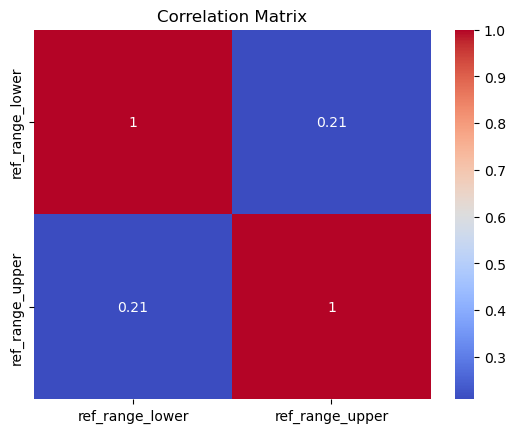

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['ref_range_lower', 'ref_range_upper']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Quality of tests

In [13]:
df['qc_flag'].value_counts()

qc_flag
OK      880807
WARN     78124
FAIL     19570
Name: count, dtype: int64

bar chart of valid/invalid tests

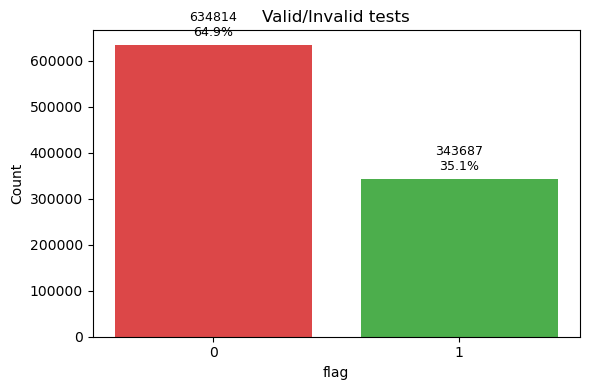

In [14]:
counts = df['flag'].value_counts()
labels = counts.index.astype(str)

fig, ax = plt.subplots(figsize=(6, 4))
colors = ['tab:green' if str(l).lower() in ('1', 'true', 'yes', 'valid', 'v') else 'tab:red' for l in labels]
bars = ax.bar(labels, counts.values, color=colors, alpha=0.85)

ax.set_title("Valid/Invalid tests")
ax.set_xlabel("flag")
ax.set_ylabel("Count")

for bar, cnt in zip(bars, counts.values):
    pct = cnt / len(df) * 100
    ax.annotate(f"{cnt}\n{pct:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 1.3 Correlation

In [21]:
df['value'].value_counts()

value
___      68645
1         7913
2.1       7115
2.0       6928
1.1       6843
         ...  
44250        1
6700         1
91000        1
11.04        1
1382         1
Name: count, Length: 4284, dtype: int64